<a href="https://www.kaggle.com/code/lostinworlds/visualisation-its-ok-not-to-be-ok?scriptVersionId=102678117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Author's comment: If you liked my work, please dont forget to upvote.*

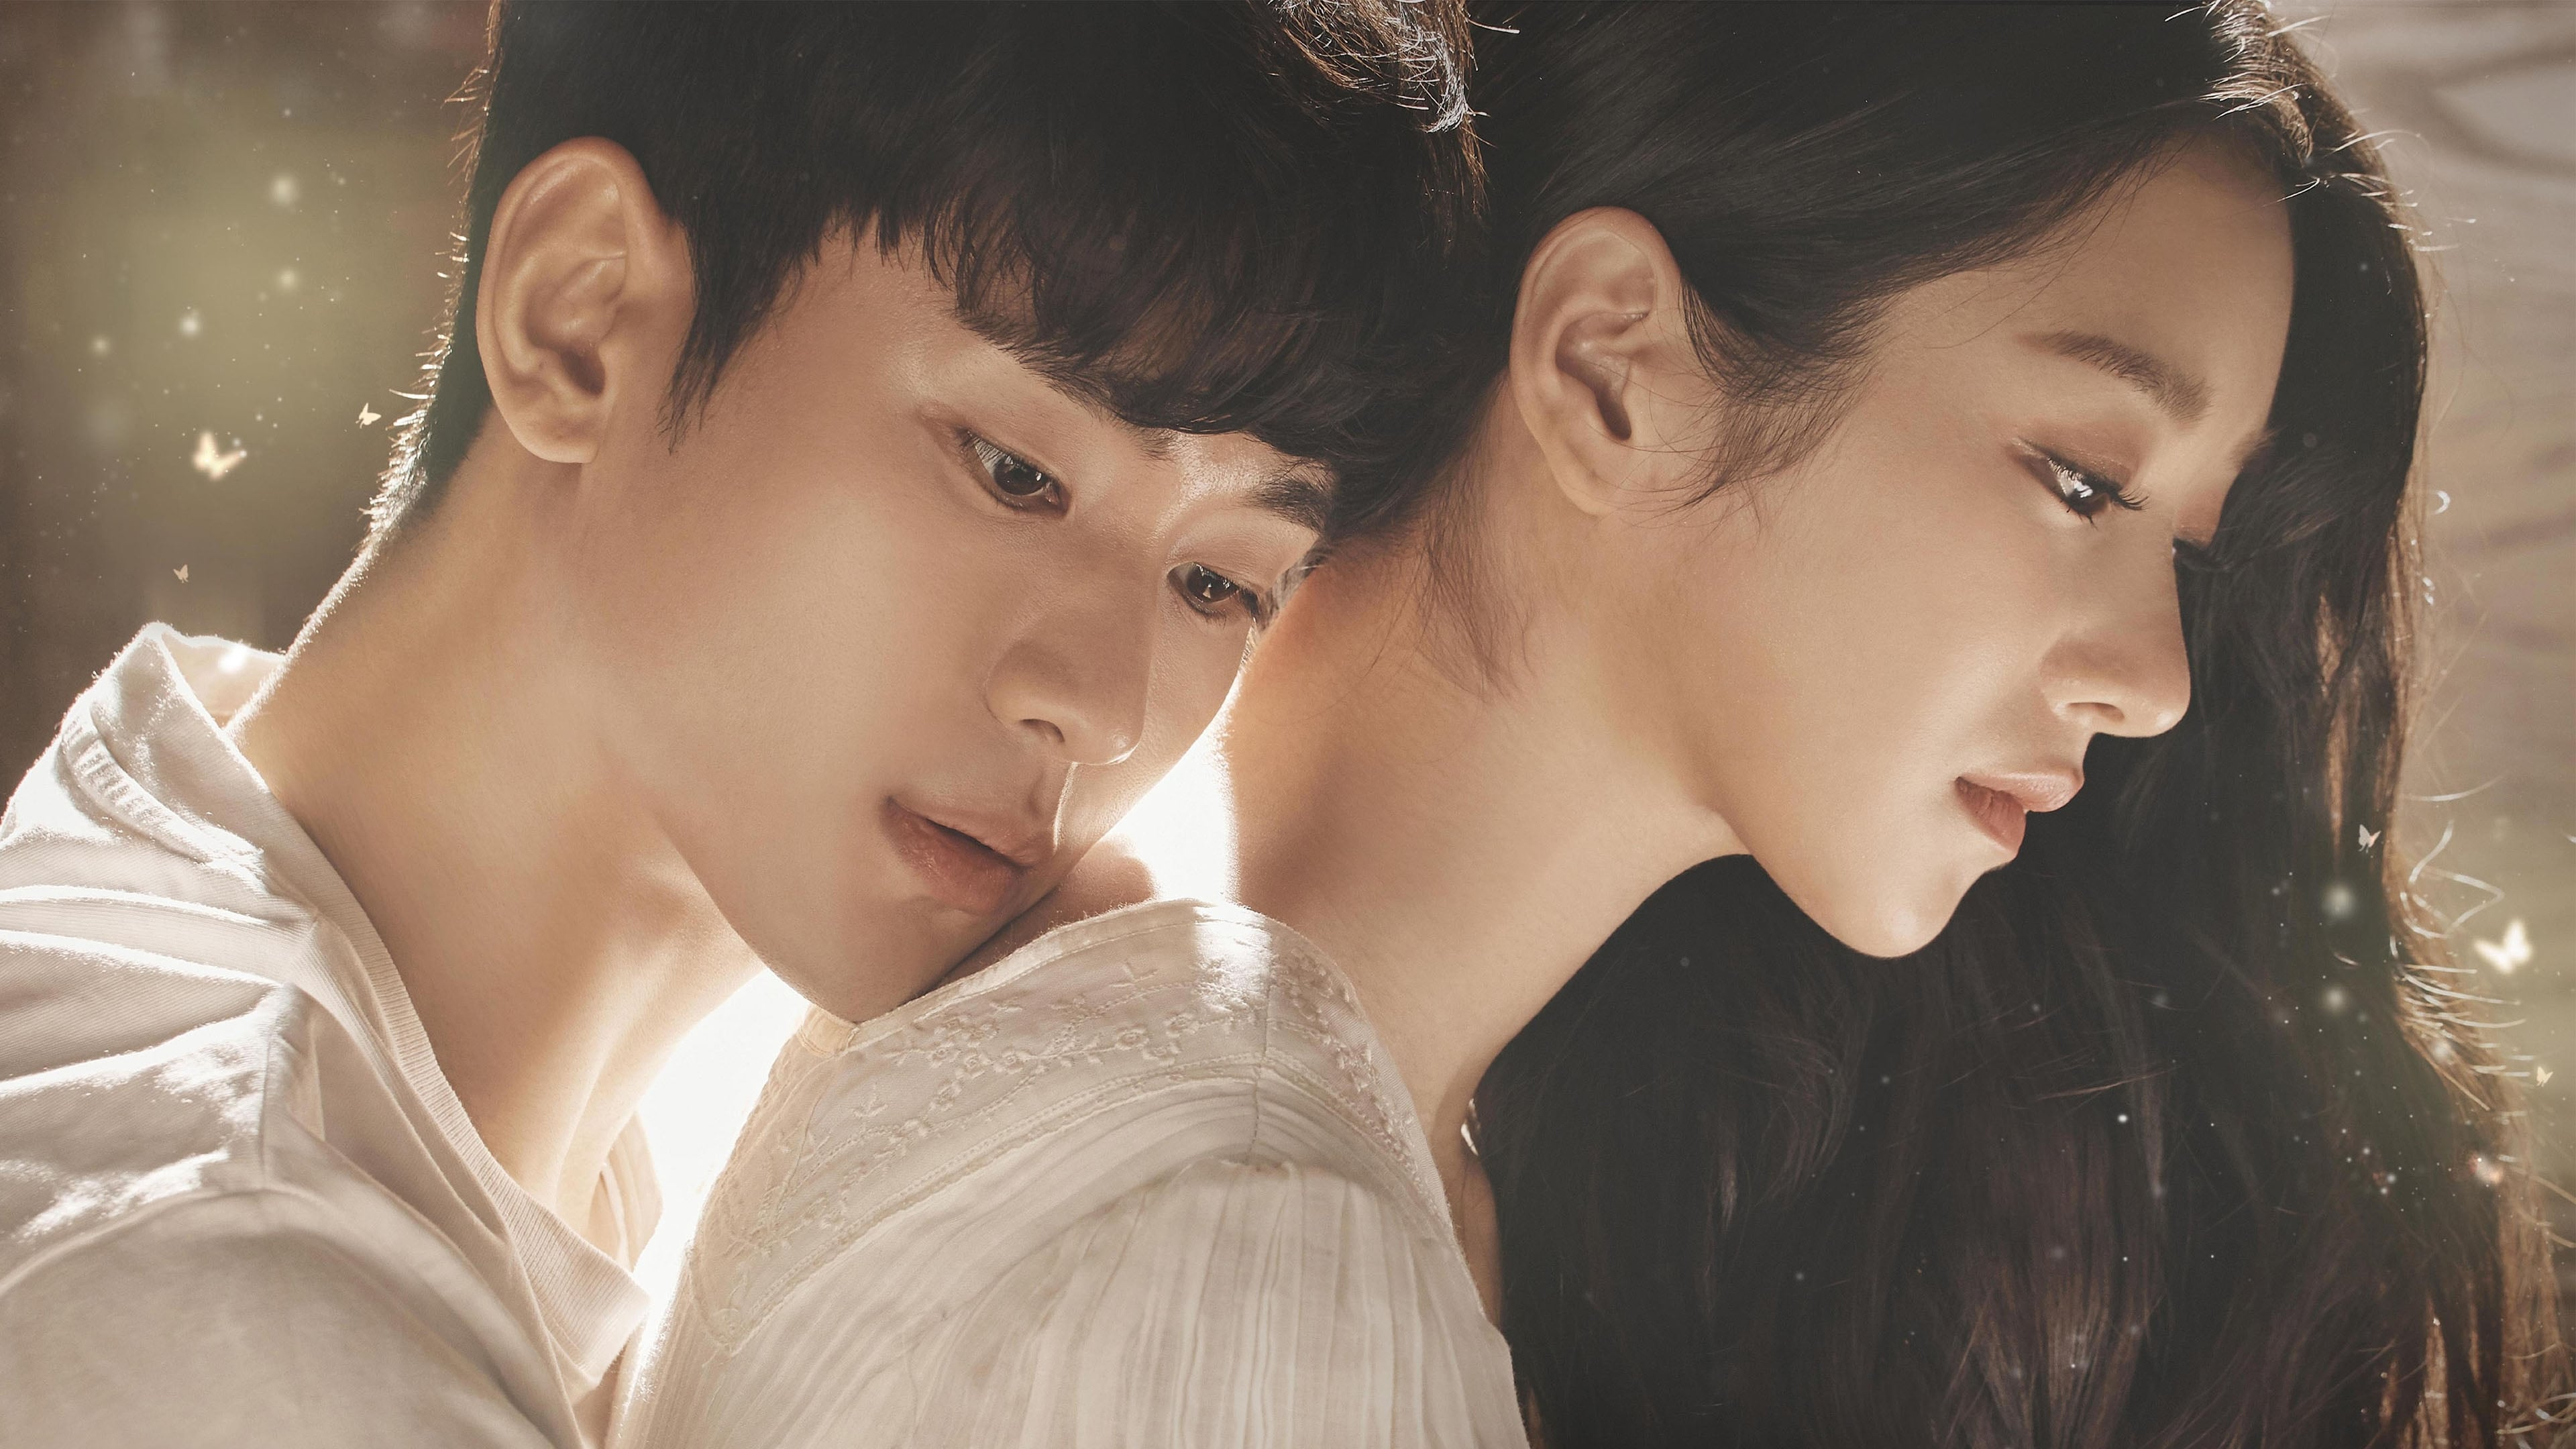

In [1]:
"""
This is a short project visualising the Average TV viewership ratings data for the korean drama, “It's Okay to Not Be Okay”. 
The data is extracted from Wikipedia. 

To ensure that the reader’s eye focuses on only the graph, the coding has been grouped together into one cell, rather than stretching it over various cells.
"""
# import libraries
import requests
from bs4 import BeautifulSoup
import numpy as np # linear algebra
import pandas as pd 
import plotly.express as px

# wikipedia website

url = "https://en.wikipedia.org/wiki/It%27s_Okay_to_Not_Be_Okay"

"""
Extract data. 
Method for extracting wikipedia data is from the following source -> https://stackoverflow.com/questions/63844703/scraping-a-table-from-multiple-table-wikipedia
"""

r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")
table = soup.find_all('table')[8]
rows = table.find_all('tr')
row_list = list()

df_list = pd.read_html(url)
df = df_list[8]
df = pd.DataFrame(df)

# process data 
#revise table shape / dop unwanted information
df.columns = df.columns.droplevel()
df["Part"].fillna(1,inplace = True)
df.drop("Ref.", axis = 1, inplace = True)
df.drop([28,29], axis = 0 , inplace = True)

# revise column name for title
df.rename(columns = {df.columns[3]: "Title"}, inplace = True)

# update data stored in columns by removing references and updating title data 
df["Title"] = df["Title"].str.split('\[|\)', expand=True).iloc[:,[0]]
df["Ep_Part"] = df["Ep."].apply(str)+"-"+df["Part"].apply(str)
df["Title"]  = df["Ep_Part"] + " " +  df["Title"]

# convert broadcast to datetime to ensure that the axis is not distored
df["Original broadcast date"] = pd.to_datetime(df["Original broadcast date"])

# extract nationwide avg from the nationwide data.
df[["Nationwide_avg", "place"]] = df["Nationwide"].str.split('\(|\)', expand=True).iloc[:,[0,1]]

df["Nationwide_avg"] = df["Nationwide_avg"].str.split("%").str[0].astype(float)
df["place"] = df["place"].str.extract('(?:(.*\d))?(?:([a-zA-Z]+))?').iloc[:,0]


# create plotly graph
fig = px.scatter(df, x ="Original broadcast date", y = "Nationwide_avg", size="Nationwide_avg", 
                 color = "Part", 
                 hover_name= "Title",
                 template = "plotly_dark", 
                 color_discrete_sequence=px.colors.qualitative.Set3_r, height=800)

# update plotly graph
# credit to Reshma for methord on annotating plotly graphs - https://medium.com/nerd-for-tech/enriching-data-visualizations-with-annotations-in-plotly-using-python-6127ff6e0f80 
fig.add_annotation(
    text = ("Source:  Wikipedia/ Nielsen Korea - <br>https://en.wikipedia.org/wiki/It%27s_Okay_to_Not_Be_Okay")
    , showarrow=False
    , x = 0
    , y = -0.1
    , xref='paper'
    , yref='paper' 
    , xanchor='left'
    , yanchor='bottom'
    , xshift=-1
    , yshift=-5
    , font=dict(size=10, color="white")
    , align="left"
    ,)

fig.update_layout(showlegend=False, 
                  title= dict(text ="<b>It's Okay to Not Be Okay <b><br><sup>Average TV viewership ratings June 20 –August 9, 2020</sup>",
                              x=0.5, 
                              font = dict(family ="Old Standard TT", size = 28) )) 

fig.update_coloraxes(showscale=False)
fig.show()